In [1]:
import pandas as pd

df = pd.read_csv('/content/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:

df.info()

df.describe(include='all').T.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [3]:
missing = df.isna().mean().sort_values(ascending=False)
missing.head(15)

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


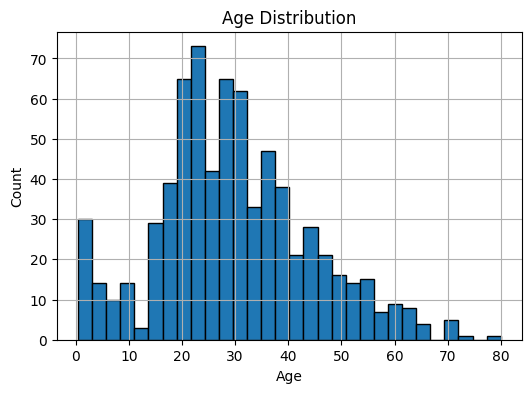

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


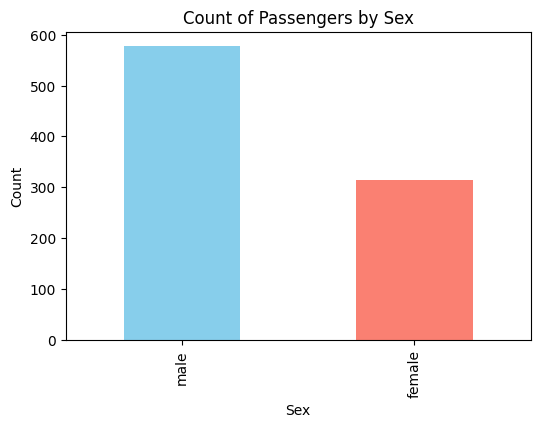

In [6]:
plt.figure(figsize=(6,4))
df['Sex'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split


drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_model = df.drop(columns=drop_cols, errors='ignore')

X = df_model.drop(columns=['Survived'])
y = df_model['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test)

(712, 179)

Baseline Logistic Regression -> Accuracy: 0.804 F1: 0.724


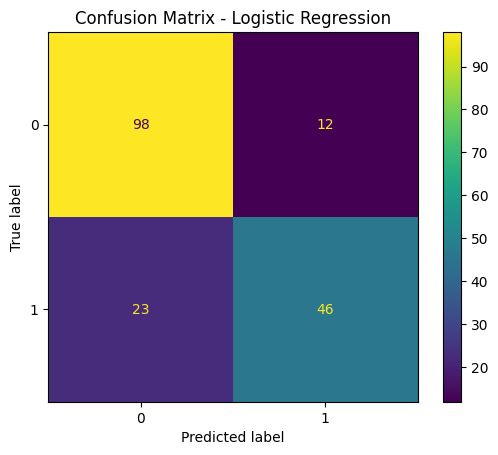

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

numeric = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric, num_cols),
    ('cat', categorical, cat_cols)
])

clf_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

clf_lr.fit(X_train, y_train)


y_pred = clf_lr.predict(X_test)


acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(clf_lr, X_test, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5]
}

grid = GridSearchCV(rf_pipe, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Best Params:", grid.best_params_)
print("RandomForest -> Accuracy:", round(acc_rf,3), "F1:", round(f1_rf,3))

Best Params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
RandomForest -> Accuracy: 0.81 F1: 0.726


In [10]:
import numpy as np

best = best_rf

ohe = best.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
num_names = X.select_dtypes(include='number').columns.tolist()
cat_names = list(ohe.get_feature_names_out([c for c in X.columns if c not in num_names]))
feature_names = num_names + cat_names

importances = best.named_steps['model'].feature_importances_
top_idx = np.argsort(importances)[::-1][:10]

print("Top 10 features:")
for i in top_idx:
    print(f"{feature_names[i]:25s} {importances[i]:.4f}")

Top 10 features:
Fare                      0.2127
Sex_male                  0.1980
Age                       0.1786
Sex_female                0.1738
Pclass                    0.1104
SibSp                     0.0454
Parch                     0.0415
Embarked_S                0.0182
Embarked_C                0.0128
Embarked_Q                0.0084


In [11]:
def summarize_models():
    print("Summary:")
    print(f"- LogisticRegression: acc={acc:.3f}, f1={f1:.3f}")
    print(f"- RandomForest (tuned): acc={acc_rf:.3f}, f1={f1_rf:.3f}")
    winner = "RandomForest" if acc_rf > acc else "LogisticRegression"
    print(f"Winner: {winner}")

summarize_models()

Summary:
- LogisticRegression: acc=0.804, f1=0.724
- RandomForest (tuned): acc=0.810, f1=0.726
Winner: RandomForest
